In [1]:
%matplotlib inline
from plots import *
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use("bmh")

In [2]:
PATH = 'ep-10steps-10samples'
df = pd.read_csv('results/log-%s.txt' % PATH, sep=',  ', engine='python')
SAMPLE_SIZE = 10

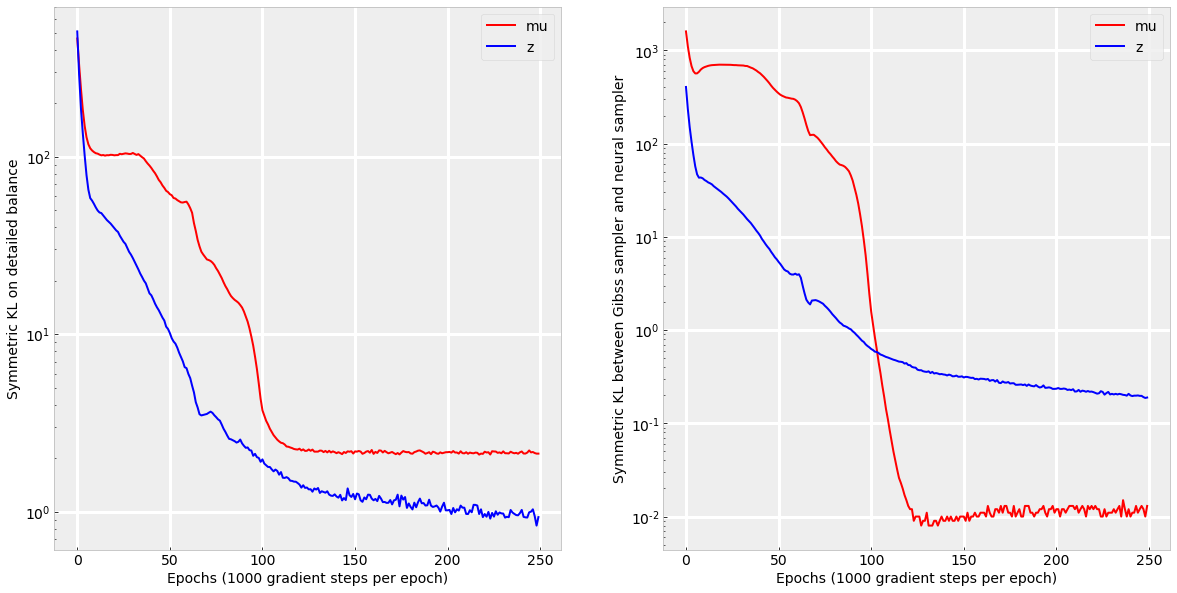

In [3]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_yscale("log")
ax1.plot(df["DB_eta"].values, 'r', label='mu')
ax1.plot(df["DB_z"].values, 'b', label='z')
ax1.tick_params(labelsize=14)
ax1.legend(fontsize=14)
ax1.set_xlabel('Epochs (1000 gradient steps per epoch)', fontsize=14)
ax1.set_ylabel("Symmetric KL on detailed balance", fontsize=14)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_yscale("log")
ax2.plot(df["KL_eta_ex"].values + df["KL_eta_in"].values, 'r', label='mu')
ax2.plot(df["KL_z_ex"].values + df["KL_z_in"].values , 'b', label='z')
ax2.legend(fontsize=14)
ax2.tick_params(labelsize=14)
ax2.set_ylabel("Symmetric KL between Gibss sampler and neural sampler",fontsize=14)
ax2.set_xlabel('Epochs (1000 gradient steps per epoch)', fontsize=14)
ax1.grid(color='w', linestyle='-', linewidth=3)
ax2.grid(color='w', linestyle='-', linewidth=3)
plt.savefig('results/train-' + PATH + '.svg')

In [4]:
DB_eta = np.load('results/DB_eta.npy')
DB_z = np.load('results/DB_z.npy')
ess = np.load('results/esss.npy')
NUM_SAMPLES = 10

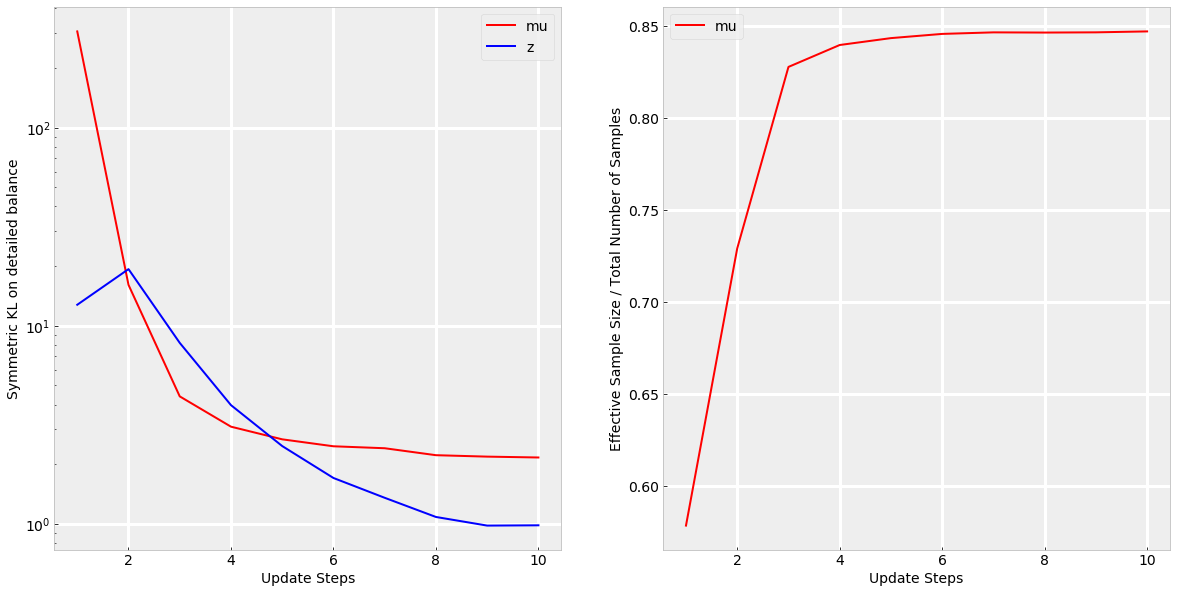

In [6]:
fig = plt.figure(figsize=(20, 10))
steps = np.arange(10) + 1
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_yscale("log")
ax1.plot(steps, DB_eta.mean(0), 'r', label='mu')
ax1.plot(steps, DB_z.mean(0), 'b', label='z')
ax1.tick_params(labelsize=14)
ax1.legend(fontsize=14)
ax1.set_xlabel('Update Steps', fontsize=14)
ax1.set_ylabel("Symmetric KL on detailed balance", fontsize=14)

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(steps, ess.mean(0)[1:] / NUM_SAMPLES, 'r', label='mu')
ax2.legend(fontsize=14)
ax2.tick_params(labelsize=14)
ax2.set_ylabel("Effective Sample Size / Total Number of Samples",fontsize=14)
ax2.set_xlabel('Update Steps', fontsize=14)
ax1.grid(color='w', linestyle='-', linewidth=3)
ax2.grid(color='w', linestyle='-', linewidth=3)
plt.savefig('results/DB-' + PATH + '.svg')